In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("eDNA-Based_distribution_assessment_of_Smallmouth_Bass_2019-2024.csv", encoding="utf-8")
df

,Year,SampleID,SampleType,EventID,SamplingLocation,SamplingSite,EventDate,RecordedBy,DecimalLatitude,DecimalLongitude,...,New_OccurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3,SMB Copies/L_1,SMB Copies/L_2,SMB Copies/L_3
0,2019,r19D:1915,Field blank,2019-r19D:1915,NaN,NaN,NaN,DFO Gulf,NaN,NaN,...,Not detected,No Ct,No Ct,No Ct,0.0,0.0,0.0,NaN,NaN,NaN
1,2019,r19D:1916,Sample,2019-r19D:1916,McKiel Bogan,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,...,Not detected,No Ct,No Ct,No Ct,0.0,0.0,0.0,NaN,NaN,NaN
2,2019,r19D:1917,Sample,2019-r19D:1917,McKiel Bogan,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,...,Not detected,No Ct,No Ct,No Ct,0.0,0.0,0.0,NaN,NaN,NaN
3,2019,r19D:1918,Sample,2019-r19D:1918,McKiel Bogan,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,...,Not detected,No Ct,No Ct,No Ct,0.0,0.0,0.0,NaN,NaN,NaN
4,2019,r19D:1919,Sample,2019-r19D:1919,McKiel Bogan,Site 2,8/27/2019,DFO Gulf,46.49888,-66.95682,...,Not detected,No Ct,No Ct,No Ct,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2024,24F-0881,Sample,2024-24F-0881,Miramichi Lake,Site 66,9/20/2024,DFO Gulf,46.45070,-66.95980,...,Detected,32.58,33.98,33.08,NaN,NaN,NaN,176.83,67.71,125.08
763,2024,24F-0882,Sample,2024-24F-0882,Miramichi Lake,Site 66,9/20/2024,DFO Gulf,46.45070,-66.95980,...,Detected,32.95,34.32,34.28,NaN,NaN,NaN,136.80,53.59,55.04
764,2024,24F-0883,Sample,2024-24F-0883,Miramichi Lake,Site 66,9/20/2024,DFO Gulf,46.45070,-66.95980,...,Detected,36.49,34.57,34.86,NaN,NaN,NaN,12.16,45.38,37.06
765,2024,24F-0884,Field blank,2024-24F-0884,NaN,NaN,9/20/2024,DFO Gulf,NaN,NaN,...,Not detected,No Ct,No Ct,No Ct,NaN,NaN,NaN,0.00,0.00,0.00


In [3]:
# ok let's clean up the table
# first, we do not want any of the field blanks in the table
mask = df["SampleType"].str.match(".*blank") == False
df = df[mask]
df = df.dropna(subset=["DecimalLatitude", "DecimalLongitude"])

In [4]:
# general question: where any two samples taken in the exact same spot?
print(df.shape[0], len(df["DecimalLatitude"].unique()))
print(df.shape[0], len(df["DecimalLongitude"].unique()))
# looks likely that there are repeat samples ... lots of them
print(df["DecimalLatitude"].value_counts())



670 139
670 138
46.50753    36
46.49828    26
46.57370    18
46.51053    17
46.56064    16
            ..
46.45410     1
46.51639     1
46.53508     1
46.54418     1
46.58142     1
Name: DecimalLatitude, Length: 139, dtype: int64


In [5]:
# take a value where there are more than one count
df[df["DecimalLatitude"] == 46.50753]
# so for example site 5 seems to all have the same coordinates


,Year,SampleID,SampleType,EventID,SamplingLocation,SamplingSite,EventDate,RecordedBy,DecimalLatitude,DecimalLongitude,...,New_OccurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3,SMB Copies/L_1,SMB Copies/L_2,SMB Copies/L_3
56,2019,r19D:2029,Sample,2019-r19D:2029,SWM River,Site 5,9/12/2019,DFO Gulf,46.50753,-66.94977,...,Detected,38.38,39.12,37.83,0.85,0.52,1.22,NaN,NaN,NaN
59,2019,r19D:2032,Sample,2019-r19D:2032,SWM River,Site 5,9/12/2019,DFO Gulf,46.50753,-66.94977,...,Inconclusive,No Ct,37.22,37.76,0.00,1.85,1.28,NaN,NaN,NaN
121,2020,r20:2187,Sample,2020-r20:2187,SWM River,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,...,Inconclusive,35.47,34.18,NaN,5.96,14.15,NaN,NaN,NaN,NaN
122,2020,r20:2188,Sample,2020-r20:2188,SWM River,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,...,Inconclusive,35.97,35.36,NaN,4.27,6.43,NaN,NaN,NaN,NaN
123,2020,r20:2189,Sample,2020-r20:2189,SWM River,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,...,Inconclusive,34.94,37.1,NaN,8.49,2.00,NaN,NaN,NaN,NaN
188,2020,r20:2440,Sample,2020-r20:2440,SWM River,Site 5,8/20/2020,Anqotum Resource Management,46.50753,-66.94977,...,Detected,35.48,36.22,NaN,5.92,3.61,NaN,NaN,NaN,NaN
189,2020,r20:2441,Sample,2020-r20:2441,SWM River,Site 5,8/20/2020,Anqotum Resource Management,46.50753,-66.94977,...,Detected,34.6,35.9,NaN,10.65,4.48,NaN,NaN,NaN,NaN
190,2020,r20:2507,Sample,2020-r20:2507,SWM River,Site 5,8/20/2020,Anqotum Resource Management,46.50753,-66.94977,...,Detected,37.53,35.56,NaN,1.50,5.63,NaN,NaN,NaN,NaN
203,2020,r20:2525,Sample,2020-r20:2525,SWM River,Site 5,9/1/2020,DFO Gulf,46.50753,-66.94977,...,Detected,35.48,36.01,NaN,5.91,4.15,NaN,NaN,NaN,NaN
204,2020,r20:2526,Sample,2020-r20:2526,SWM River,Site 5,9/1/2020,DFO Gulf,46.50753,-66.94977,...,Not detected,No Ct,No Ct,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [6]:
# are all latitude observations positive?
print(sum(df["DecimalLatitude"] < 0))
# are all latitude observations negative?
print(sum(df["DecimalLongitude"] > 0))
# clean the site names
df["SamplingSite"] = df["SamplingSite"].apply(lambda x: str(x).strip())
df["SamplingSite"] = df["SamplingSite"].replace("nan", "missing").replace("", "missing")
# for fun, lets order the table by date
df["EventDate"] = pd.to_datetime(df["EventDate"], format="%m/%d/%Y")
df = df.sort_values("EventDate")

0
0


In [7]:
color_map = {
    'Not detected': "green",
    'Suspected': "orange",
    'Inconclusive': "grey",
    'Detected': "red",
}
colors = df["New_OccurrenceStatus"].map(color_map)
x = df["DecimalLongitude"]
y = df["DecimalLatitude"]

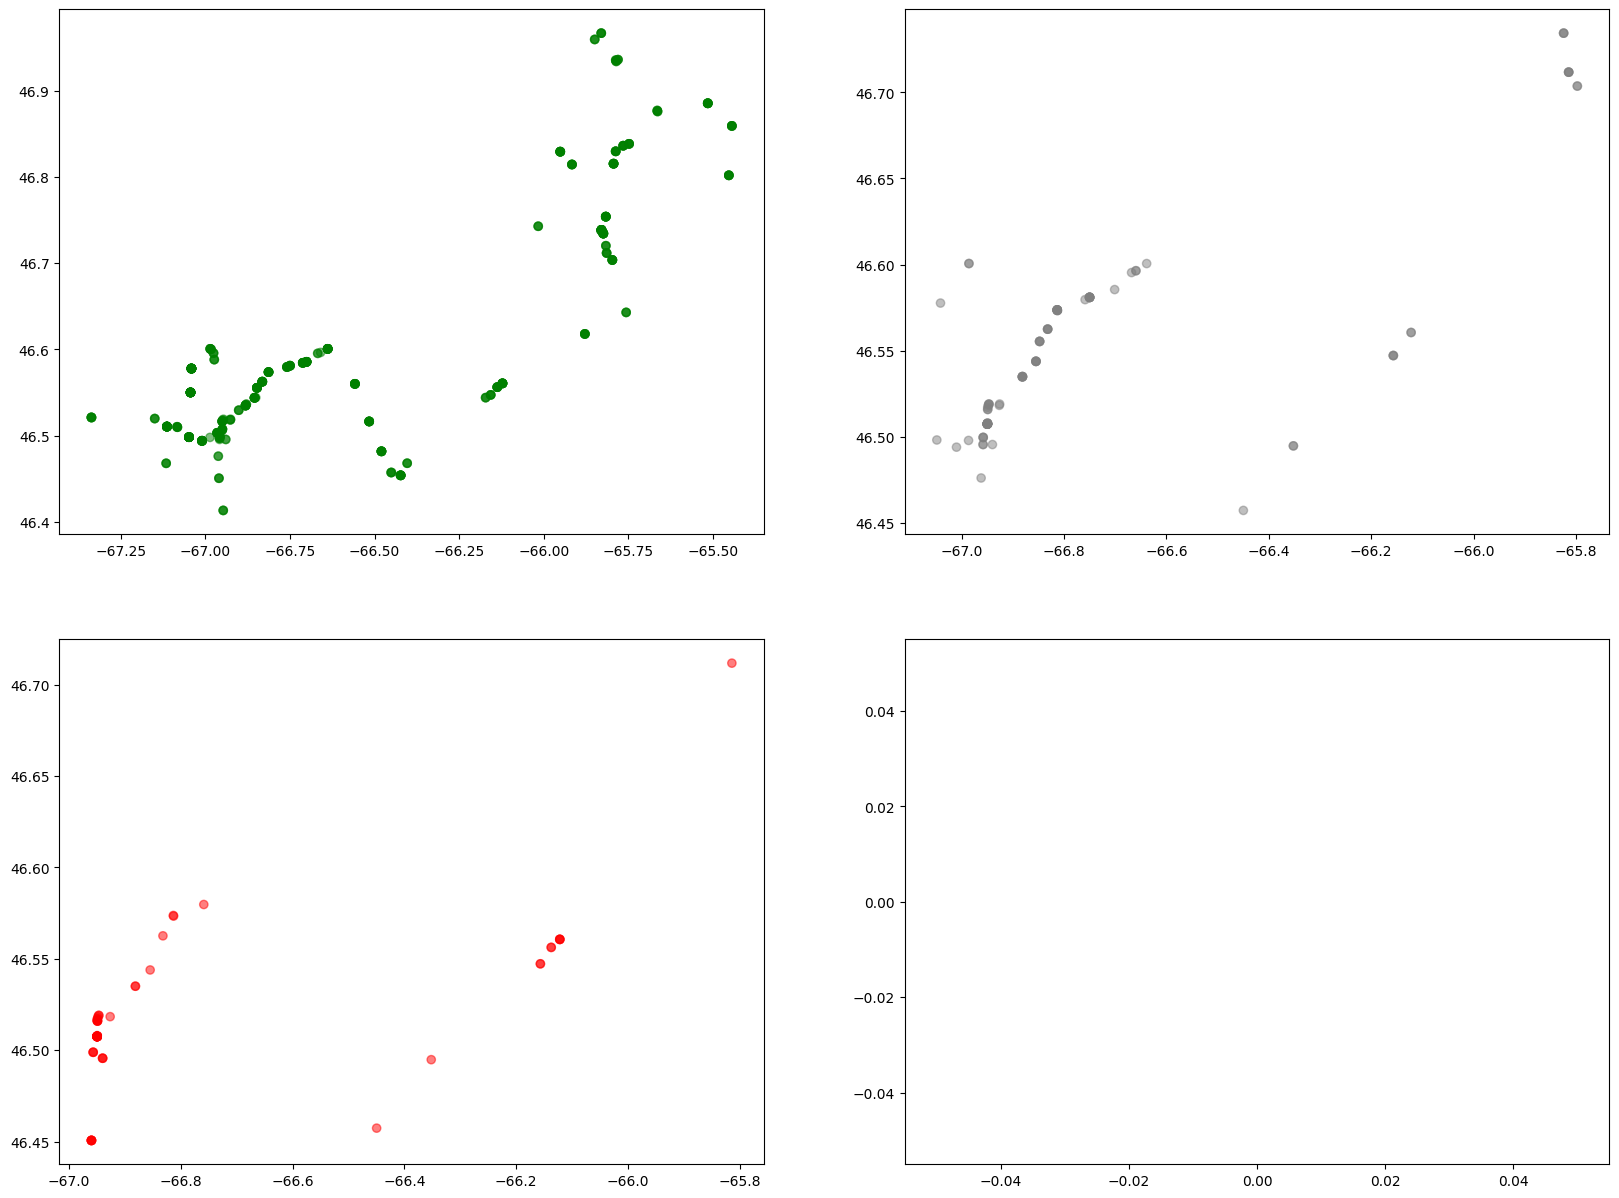

In [8]:
nrow = 2
ncol = 2
rows = range(0, nrow)
cols = range(0, ncol)
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 15))

i = 0
for row in rows:
    for col in cols:
        ax = axs[row, col]
        color = colors.unique()[i]
        ax.scatter(x[colors == color], y[colors == color], c=colors[colors == color], alpha=0.5)
        i += 1

plt.show()

In [9]:
# which columns do we want to include in the final product?
# subdf=df.loc[:,["sampleID", 'Year', 'EventDate', 'recordedBy', 'DecimalLatitude', 'DecimalLongitude', 'occurrenceStatus', 'color']]

# now let's deal with the tricky problem of the duplicate lat longs. This will really improve the viewing experience
subdf = df.loc[:, ["DecimalLatitude", "DecimalLongitude"]].drop_duplicates().copy()
subdf.columns = ["Latitude", "Longitude"]
subdf

,Latitude,Longitude
1,46.503350,-66.96510
27,46.519060,-66.94672
26,46.519160,-66.94681
25,46.518280,-66.94820
24,46.518300,-66.94826
...,...,...
744,46.829142,-65.95141
745,46.829100,-65.95140
747,46.815200,-65.79380
763,46.450700,-66.95980


In [10]:
# start building the columns of the new df
sites = list()
sample_ids = list()
years = list()
event_dates = list()
recorded_bys = list()
occurrence_statuses = list()


# subdf.columns = ["Sample ID", 'year', 'Event Date', 'Recorded By', 'Latitude', 'Longitude', 'Occurrence Status', 'Color (mapping)']
def clean_list(l):
    return str([item for item in l]).replace("'", "").replace("[", "").replace("]", "")#.replace(",", "/")


for index, row in subdf.iterrows():
    # using the lat/long, we will query the full df
    lat = row[0]
    lng = row[1]
    mask = (df["DecimalLatitude"] == lat) & (df["DecimalLongitude"] == lng)
    sites.append(clean_list(df[mask]["SamplingSite"].unique()))
    sample_ids.append(clean_list(df[mask]["SampleID"].unique()))
    years.append(clean_list(df[mask]["Year"].unique()))
    event_dates.append(clean_list([str(d).split("T")[0] for d in df[mask]["EventDate"].unique()]))
    recorded_bys.append(clean_list(df[mask]["RecordedBy"].unique()))
    occurrence_statuses.append(clean_list(df[mask]["New_OccurrenceStatus"].unique()))

subdf["Site"] = sites
subdf["Sample IDs"] = sample_ids
subdf["Year"] = years
subdf["Event Date"] = event_dates
subdf["Recorded By"] = recorded_bys
subdf["Occurrence Status"] = occurrence_statuses

subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status
1,46.503350,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, Anqotum Resource Management",Not detected
27,46.519060,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,"Inconclusive, Detected, Not detected"
26,46.519160,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Inconclusive
25,46.518280,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive
24,46.518300,-66.94826,Site 8,r19D:1941,2019,2019-08-27,DFO Gulf,Detected
...,...,...,...,...,...,...,...,...
744,46.829142,-65.95141,Site 41,24F-0870,2024,2024-07-25,DFO Gulf,Not detected
745,46.829100,-65.95140,Site 41,"24F-0871, 24F-0872",2024,2024-07-25,DFO Gulf,Not detected
747,46.815200,-65.79380,Site 43,"24F-0873, 24F-0874, 24F-0875",2024,2024-07-25,DFO Gulf,Not detected
763,46.450700,-66.95980,Site 66,"24F-0882, 24F-0881, 24F-0883",2024,2024-09-20,DFO Gulf,Detected


In [11]:
# how to deal with the occurrences
df["New_OccurrenceStatus"].unique()


def cleaner_func(x):
    if "Detected" in x:
        return "Detected"
    elif "Suspected" in x:
        return "Suspected"
    elif "Inconclusive" in x:
        return "Inconclusive"
    else:
        return "Not detected"


subdf["Occurrence Status"] = subdf["Occurrence Status"].apply(lambda x: cleaner_func(x))
subdf["Color (mapping)"] = subdf["Occurrence Status"].map(color_map)
subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status,Color (mapping)
1,46.503350,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, Anqotum Resource Management",Not detected,green
27,46.519060,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Detected,red
26,46.519160,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Inconclusive,grey
25,46.518280,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive,grey
24,46.518300,-66.94826,Site 8,r19D:1941,2019,2019-08-27,DFO Gulf,Detected,red
...,...,...,...,...,...,...,...,...,...
744,46.829142,-65.95141,Site 41,24F-0870,2024,2024-07-25,DFO Gulf,Not detected,green
745,46.829100,-65.95140,Site 41,"24F-0871, 24F-0872",2024,2024-07-25,DFO Gulf,Not detected,green
747,46.815200,-65.79380,Site 43,"24F-0873, 24F-0874, 24F-0875",2024,2024-07-25,DFO Gulf,Not detected,green
763,46.450700,-66.95980,Site 66,"24F-0882, 24F-0881, 24F-0883",2024,2024-09-20,DFO Gulf,Detected,red


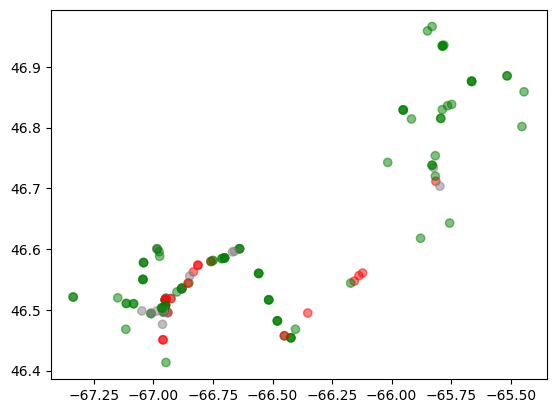

In [12]:
# re-plotting
x = subdf["Longitude"]
y = subdf["Latitude"]
colors = subdf["Color (mapping)"]
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [13]:
# write the final dataframe to a CSV
subdf.to_csv("./SMB_eDNA_WMS_english.csv", index=False, encoding="windows-1252")
# display
subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status,Color (mapping)
1,46.503350,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, Anqotum Resource Management",Not detected,green
27,46.519060,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Detected,red
26,46.519160,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Inconclusive,grey
25,46.518280,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive,grey
24,46.518300,-66.94826,Site 8,r19D:1941,2019,2019-08-27,DFO Gulf,Detected,red
...,...,...,...,...,...,...,...,...,...
744,46.829142,-65.95141,Site 41,24F-0870,2024,2024-07-25,DFO Gulf,Not detected,green
745,46.829100,-65.95140,Site 41,"24F-0871, 24F-0872",2024,2024-07-25,DFO Gulf,Not detected,green
747,46.815200,-65.79380,Site 43,"24F-0873, 24F-0874, 24F-0875",2024,2024-07-25,DFO Gulf,Not detected,green
763,46.450700,-66.95980,Site 66,"24F-0882, 24F-0881, 24F-0883",2024,2024-09-20,DFO Gulf,Detected,red


In [14]:
# now to frenchifry...
subdf_fr = subdf.copy()
# print(subdf.columns)
subdf_fr.columns = [
    "Latitude",
    "Longitude",
    "Site de l'échantillon",
    "ID de l'échantillon",
    "Année",
    "Date de l'événement",
    "Enregistré par",
    "Statut de l'événement",
    "Couleur (cartographie)"
]

# convert the occurrences
fr_map = {
    'Not detected': "Non détecté",
    'Suspected': "Suspecté",
    'Inconclusive': "Non concluant",
    'Detected': "Détecté",
}
subdf_fr["Statut de l'événement"] = subdf_fr["Statut de l'événement"].map(fr_map)

# write the final dataframe to a CSV
subdf_fr.to_csv("./SMB_eDNA_WMS_francais.csv", index=False, encoding="windows-1252")
# display
subdf_fr


,Latitude,Longitude,Site de l'échantillon,ID de l'échantillon,Année,Date de l'événement,Enregistré par,Statut de l'événement,Couleur (cartographie)
1,46.503350,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, Anqotum Resource Management",Non détecté,green
27,46.519060,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Détecté,red
26,46.519160,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Non concluant,grey
25,46.518280,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Non concluant,grey
24,46.518300,-66.94826,Site 8,r19D:1941,2019,2019-08-27,DFO Gulf,Détecté,red
...,...,...,...,...,...,...,...,...,...
744,46.829142,-65.95141,Site 41,24F-0870,2024,2024-07-25,DFO Gulf,Non détecté,green
745,46.829100,-65.95140,Site 41,"24F-0871, 24F-0872",2024,2024-07-25,DFO Gulf,Non détecté,green
747,46.815200,-65.79380,Site 43,"24F-0873, 24F-0874, 24F-0875",2024,2024-07-25,DFO Gulf,Non détecté,green
763,46.450700,-66.95980,Site 66,"24F-0882, 24F-0881, 24F-0883",2024,2024-09-20,DFO Gulf,Détecté,red
